In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df=pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: ylabel='charges'>

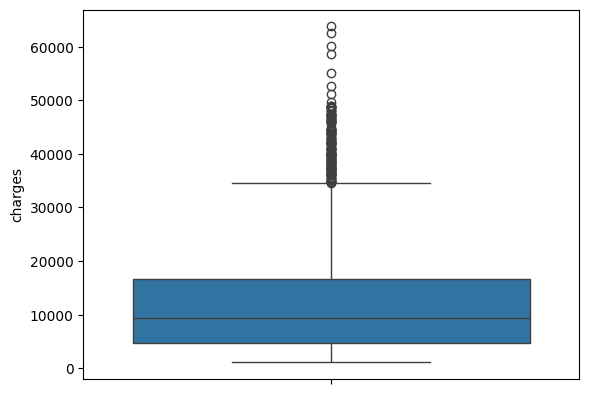

In [ ]:
import seaborn as sns
sns.boxplot(df['charges'])

In [ ]:
q1=df['charges'].quantile(0.25)
q3=df['charges'].quantile(0.75)
iqr=q3-q1
iqr

11899.625365

In [ ]:
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
print(upper_bound)
print(lower_bound)

34489.350562499996
-13109.1508975


In [ ]:
new_df=df[(df['charges']>=lower_bound)&(df['charges']<=upper_bound)]
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

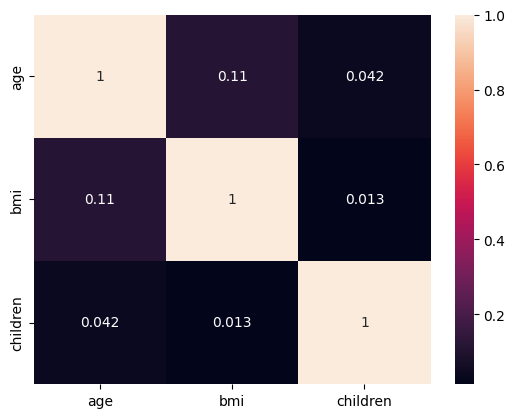

In [ ]:
df1=df[['age','bmi','children']]
sns.heatmap(df1.corr(),annot=True)

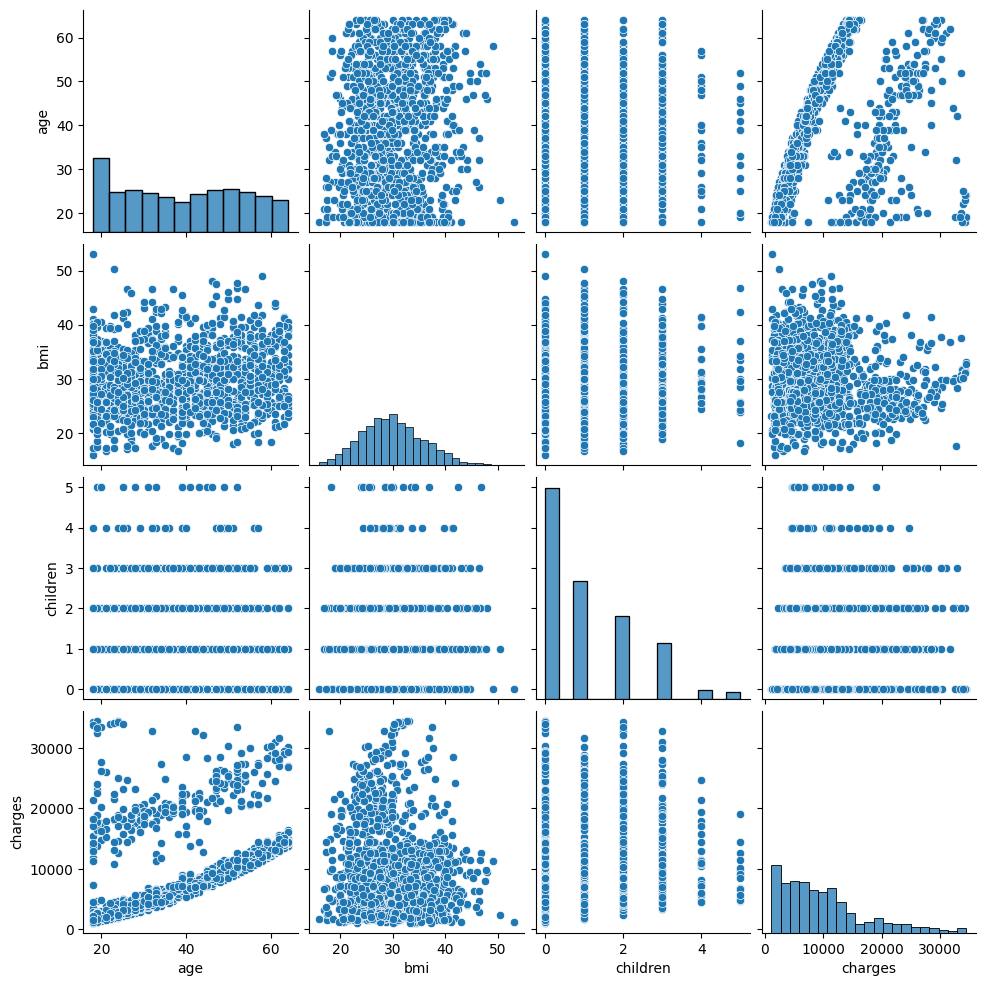

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(new_df)
plt.show()

In [ ]:
encoded_df = pd.get_dummies(new_df,drop_first=True)
encoded_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [ ]:
x=encoded_df.drop('charges', axis=1)
y=encoded_df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=2)

In [ ]:
model = LinearRegression()
model = model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([17395.11917217, 22249.58580912,  9945.52983869,  7183.55014283,
        6671.13618078, 13088.82400441, 13205.76587498, 10259.48015154,
       10325.58668618,  2627.0205074 ,  5870.17482132,  1279.33712216,
        3471.36992409, 15036.3109143 , 14499.85003262, 14636.27497455,
       14165.63565116,  3587.86687501, 25537.96687791,  3208.10275938,
       12685.46930648,  7581.51540161,  6354.89940446, 24039.680828  ,
        6527.23595485,  9617.70242295, 26716.56525811,  9337.33749186,
        4521.07557428,  2119.9993439 ,  8423.50841595, 12242.38218252,
        5055.58474192,  7779.95850427,  2492.74058143,  3869.95913503,
        9296.14782779, 27170.57860984,  2581.16822113,  3898.98863783,
        9510.42645158,  9579.10717959,  3506.91110368, 12836.14159933,
       20569.57835636, 10257.79138211, 10906.94933229,  8862.77192188,
        3049.10614775,  5605.476509  , 21494.31701259,  6643.67514705,
       13167.85766445,  6781.9026581 ,  6993.26033986, 11914.66640116,
      

In [ ]:
s = model.score(x_train,y_train) #training score
s

0.5735757753950068

In [ ]:
mse=mean_squared_error(y_test,y_predict)
mse

21681592.401348393

In [ ]:
r2=r2_score(y_test,y_predict)
r2

0.5781806323129922

In [ ]:
print(model.intercept_) #c
print(model.coef_) #m
len(model.coef_)

-3286.0548791595174
[  245.66511215   142.48512233   523.70896558 -2191.7092532
 14383.37848699  -663.20579707 -2363.37623824 -2473.01329954]


8

In [ ]:
import statsmodels.api as sm
X = encoded_df.drop('charges', axis=1)
y = encoded_df['charges']
X = X.astype(float)
y = y.astype(float)
import statsmodels.api as sm
# Add a constant column to X
X = sm.add_constant(X)
# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()
# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     227.4
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          1.57e-233
Time:                        11:10:28   Log-Likelihood:                -11801.
No. Observations:                1199   AIC:                         2.362e+04
Df Residuals:                    1190   BIC:                         2.367e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2879.2091    812.499  